Documentation: https://spark.apache.org/docs/latest/api/python/index.html

### Explore the COVID data

In [3]:
# Check out pre-loaded dataset
display(dbutils.fs.ls('dbfs:/databricks-datasets/COVID/covid-19-data/'))

path,name,size
dbfs:/databricks-datasets/COVID/covid-19-data/.git/,.git/,0
dbfs:/databricks-datasets/COVID/covid-19-data/.github/,.github/,0
dbfs:/databricks-datasets/COVID/covid-19-data/.gitignore,.gitignore,10
dbfs:/databricks-datasets/COVID/covid-19-data/LICENSE,LICENSE,1289
dbfs:/databricks-datasets/COVID/covid-19-data/NEW-YORK-DEATHS-METHODOLOGY.md,NEW-YORK-DEATHS-METHODOLOGY.md,2771
dbfs:/databricks-datasets/COVID/covid-19-data/NYT-readme.md,NYT-readme.md,1748
dbfs:/databricks-datasets/COVID/covid-19-data/PROBABLE-CASES-NOTE.md,PROBABLE-CASES-NOTE.md,3162
dbfs:/databricks-datasets/COVID/covid-19-data/README.md,README.md,19391
dbfs:/databricks-datasets/COVID/covid-19-data/excess-deaths/,excess-deaths/,0
dbfs:/databricks-datasets/COVID/covid-19-data/live/,live/,0


In [4]:
spark.read.text('dbfs:/databricks-datasets/COVID/covid-19-data/README.md').display()

value
# Coronavirus (Covid-19) Data in the United States
""
**NEW:** We are publishing the data behind our [survey of mask usage](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html) in the United States in order to provide researchers a way to understand the role of mask wearing in the course of the pandemic. See the data and documentation in the [mask-use/](mask-use/) directory.
""
**NEW:** We are publishing the data behind our [excess deaths tracker](https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html) in order to provide researchers and the public with a better record of the true toll of the pandemic. This data is compiled from official national and municipal data for 24 countries. See the data and documentation in the [excess-deaths/](excess-deaths/) directory.
""
---
""
[ [U.S. Data](us.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv)) | [U.S. State-Level Data](us-states.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv)) | [U.S. County-Level Data](us-counties.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv)) ]
""


Open `us-states.csv` and explore the schema

In [6]:
states = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/us-states.csv'))
states.display()

date,state,fips,cases,deaths
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0
2020-01-26,California,6,2,0


In [7]:
states.printSchema()

root
-- date: string (nullable = true)
-- state: string (nullable = true)
-- fips: integer (nullable = true)
-- cases: integer (nullable = true)
-- deaths: integer (nullable = true)

Explore the `us-counties.csv` and answer the following questions:
1. What's the time span of the data (firsta and last date)?
2. Agregate the table by state:
  - Which state has the most confirmed cases and confirmed deaths?
  - Make a plot.

In [9]:
counties = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/live/us-counties.csv'))
counties.display()

date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
2020-09-28,Autauga,Alabama,1001,1785,25,1601,24,184,1
2020-09-28,Baldwin,Alabama,1003,5588,50,5086,46,502,4
2020-09-28,Barbour,Alabama,1005,886,7,668,7,218,0
2020-09-28,Bibb,Alabama,1007,657,10,623,6,34,4
2020-09-28,Blount,Alabama,1009,1618,15,1256,15,362,0
2020-09-28,Bullock,Alabama,1011,607,14,582,13,25,1
2020-09-28,Butler,Alabama,1013,914,39,878,38,36,1
2020-09-28,Calhoun,Alabama,1015,3548,44,3183,36,365,8
2020-09-28,Chambers,Alabama,1017,1172,42,898,40,274,2
2020-09-28,Cherokee,Alabama,1019,614,13,464,12,150,1


In [10]:
counties.printSchema()

root
-- date: date (nullable = true)
-- county: string (nullable = true)
-- state: string (nullable = true)
-- fips: integer (nullable = true)
-- cases: integer (nullable = true)
-- deaths: integer (nullable = true)
-- confirmed_cases: integer (nullable = true)
-- confirmed_deaths: integer (nullable = true)
-- probable_cases: integer (nullable = true)
-- probable_deaths: integer (nullable = true)

In [11]:
# Convert `date` from string to date type

In [12]:
from pyspark.sql.types import DateType
import pyspark.sql.functions as F

In [13]:
counties = counties.withColumn("date", counties.date.cast(DateType()))
counties = counties.withColumn("date", F.to_date(counties.date, 'yyyy-MM-dd'))

In [14]:
counties.select(counties.fips).collect()

Out[11]: [Row(fips=1001),
 Row(fips=1003),
 Row(fips=1005),
 Row(fips=1007),
 Row(fips=1009),
 Row(fips=1011),
 Row(fips=1013),
 Row(fips=1015),
 Row(fips=1017),
 Row(fips=1019),
 Row(fips=1021),
 Row(fips=1023),
 Row(fips=1025),
 Row(fips=1027),
 Row(fips=1029),
 Row(fips=1031),
 Row(fips=1033),
 Row(fips=1035),
 Row(fips=1037),
 Row(fips=1039),
 Row(fips=1041),
 Row(fips=1043),
 Row(fips=1045),
 Row(fips=1047),
 Row(fips=1049),
 Row(fips=1051),
 Row(fips=1053),
 Row(fips=1055),
 Row(fips=1057),
 Row(fips=1059),
 Row(fips=1061),
 Row(fips=1063),
 Row(fips=1065),
 Row(fips=1067),
 Row(fips=1069),
 Row(fips=1071),
 Row(fips=1073),
 Row(fips=1075),
 Row(fips=1077),
 Row(fips=1079),
 Row(fips=1081),
 Row(fips=1083),
 Row(fips=1085),
 Row(fips=1087),
 Row(fips=1089),
 Row(fips=1091),
 Row(fips=1093),
 Row(fips=1095),
 Row(fips=1097),
 Row(fips=1099),
 Row(fips=1101),
 Row(fips=1103),
 Row(fips=1105),
 Row(fips=1107),
 Row(fips=1109),
 Row(fips=1111),
 Row(fips=1113),
 Row(fips=1117),
 Row(fips=1115),
 Row(fips=1119),
 Row(fips=1121),
 Row(fips=1123),
 Row(fips=1125),
 Row(fips=1127),
 Row(fips=1129),
 Row(fips=1131),
 Row(fips=1133),
 Row(fips=2013),
 Row(fips=2016),
 Row(fips=2020),
 Row(fips=2050),
 Row(fips=2060),
 Row(fips=2068),
 Row(fips=2070),
 Row(fips=2090),
 Row(fips=2100),
 Row(fips=2110),
 Row(fips=2122),
 Row(fips=2130),
 Row(fips=2150),
 Row(fips=2158),
 Row(fips=2164),
 Row(fips=2170),
 Row(fips=2180),
 Row(fips=2185),
 Row(fips=2188),
 Row(fips=2195),
 Row(fips=2198),
 Row(fips=2220),
 Row(fips=2240),
 Row(fips=None),
 Row(fips=2261),
 Row(fips=2275),
 Row(fips=2290),
 Row(fips=4001),
 Row(fips=4003),
 Row(fips=4005),
 Row(fips=4007),
 Row(fips=4009),
 Row(fips=4011),
 Row(fips=4012),
 Row(fips=4013),
 Row(fips=4015),
 Row(fips=4017),
 Row(fips=4019),
 Row(fips=4021),
 Row(fips=4023),
 Row(fips=4025),
 Row(fips=4027),
 Row(fips=5001),
 Row(fips=5003),
 Row(fips=5005),
 Row(fips=5007),
 Row(fips=5009),
 Row(fips=5011),
 Row(fips=5013),
 Row(fips=5015),
 Row(fips=5017),
 Row(fips=5019),
 Row(fips=5021),
 Row(fips=5023),
 Row(fips=5025),
 Row(fips=5027),
 Row(fips=5029),
 Row(fips=5031),
 Row(fips=5033),
 Row(fips=5035),
 Row(fips=5037),
 Row(fips=5039),
 Row(fips=5041),
 Row(fips=5043),
 Row(fips=5045),
 Row(fips=5047),
 Row(fips=5049),
 Row(fips=5051),
 Row(fips=5053),
 Row(fips=5055),
 Row(fips=5057),
 Row(fips=5059),
 Row(fips=5061),
 Row(fips=5063),
 Row(fips=5065),
 Row(fips=5067),
 Row(fips=5069),
 Row(fips=5071),
 Row(fips=5073),
 Row(fips=5075),
 Row(fips=5077),
 Row(fips=5079),
 Row(fips=5081),
 Row(fips=5083),
 Row(fips=5085),
 Row(fips=5087),
 Row(fips=5089),
 Row(fips=5091),
 Row(fips=5093),
 Row(fips=5095),
 Row(fips=5097),
 Row(fips=5099),
 Row(fips=5101),
 Row(fips=5103),
 Row(fips=5105),
 Row(fips=5107),
 Row(fips=5109),
 Row(fips=5111),
 Row(fips=5113),
 Row(fips=5115),
 Row(fips=5117),
 Row(fips=5119),
 Row(fips=5121),
 Row(fips=5125),
 Row(fips=5127),
 Row(fips=5129),
 Row(fips=5131),
 Row(fips=5133),
 Row(fips=5135),
 Row(fips=5123),
 Row(fips=5137),
 Row(fips=5139),
 Row(fips=None),
 Row(fips=5141),
 Row(fips=5143),
 Row(fips=5145),
 Row(fips=5147),
 Row(fips=5149),
 Row(fips=6001),
 Row(fips=6003),
 Row(fips=6005),
 Row(fips=6007),
 Row(fips=6009),
 Row(fips=6011),
 Row(fips=6013),
 Row(fips=6015),
 Row(fips=6017),
 Row(fips=6019),
 Row(fips=6021),
 Row(fips=6023),
 Row(fips=6025),
 Row(fips=6027),
 Row(fips=6029),
 Row(fips=6031),
 Row(fips=6033),
 Row(fips=6035),
 Row(fips=6037),
 Row(fips=6039),
 Row(fips=6041),
 Row(fips=6043),
 Row(fips=6045),
 Row(fips=6047),
 Row(fips=6049),
 Row(fips=6051),
 Row(fips=6053),
 Row(fips=6055),
 Row(fips=6057),
 Row(fips=6059),
 Row(fips=6061),
 Row(fips=6063),
 Row(fips=6065),
 Row(fips=6067),
 Row(fips=6069),
 Row(fips=6071),
 Row(fips=6073),
 Row(fips=6075),
 Row(fips=6077),
 Row(fips=6079),
 Row(fips=6081),
 Row(fips=6083),
 Row(fips=6085),
 Row(fips=6087),
 Row(fips=6089),
 Row(fips=6091),
 Row(fips=6093),
 Row(fips=6095),
 Row(fips=6097),
 Row(fips=609

In [15]:
# First day in the dataset

In [16]:
counties.select(min('date')).show()

--------------------------------------------------------------------------- 
 AnalysisException Traceback (most recent call last)
 <command-65489250009039> in <module> 
 ----> 1 counties . select ( min ( 'date' ) ) . show ( ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in select (self, *cols) 
 1437 [ Row ( name = u'Alice' , age = 12 ) , Row ( name = u'Bob' , age = 15 ) ] 
 1438 """
 -> 1439 jdf = self . _jdf . select ( self . _jcols ( * cols ) ) 
 1440 return DataFrame ( jdf , self . sql_ctx ) 
 1441 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 131 # Hide where the exception came from that shows a non-Pythonic 
 132 # JVM exception message. 
 --> 133 raise_from ( converted ) 
 134 else : 
 135 raise 

 /databricks/spark/python/pyspark/sql/utils.py in raise_from (e) 

 AnalysisException : cannot resolve '`a`' given input columns: [cases, confirmed_cases, confirmed_deaths, county, date, deaths, fips, probable_cases, probable_deaths, state];;
'Project ['a]
+- Project [cast(date#120 as date) AS date#177, county#121, state#122, fips#123, cases#124, deaths#125, confirmed_cases#126, confirmed_deaths#127, probable_cases#128, probable_deaths#129]
 +- Relation[date#120,county#121,state#122,fips#123,cases#124,deaths#125,confirmed_cases#126,confirmed_deaths#127,probable_cases#128,probable_deaths#129] csv

In [17]:
counties.sort("date",ascending=True).collect()

Out[28]: [Row(date=datetime.date(2020, 9, 28), county='Autauga', state='Alabama', fips=1001, cases=1785, deaths=25, confirmed_cases=1601, confirmed_deaths=24, probable_cases=184, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Baldwin', state='Alabama', fips=1003, cases=5588, deaths=50, confirmed_cases=5086, confirmed_deaths=46, probable_cases=502, probable_deaths=4),
 Row(date=datetime.date(2020, 9, 28), county='Barbour', state='Alabama', fips=1005, cases=886, deaths=7, confirmed_cases=668, confirmed_deaths=7, probable_cases=218, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Bibb', state='Alabama', fips=1007, cases=657, deaths=10, confirmed_cases=623, confirmed_deaths=6, probable_cases=34, probable_deaths=4),
 Row(date=datetime.date(2020, 9, 28), county='Blount', state='Alabama', fips=1009, cases=1618, deaths=15, confirmed_cases=1256, confirmed_deaths=15, probable_cases=362, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Bullock', state='Alabama', fips=1011, cases=607, deaths=14, confirmed_cases=582, confirmed_deaths=13, probable_cases=25, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Butler', state='Alabama', fips=1013, cases=914, deaths=39, confirmed_cases=878, confirmed_deaths=38, probable_cases=36, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Calhoun', state='Alabama', fips=1015, cases=3548, deaths=44, confirmed_cases=3183, confirmed_deaths=36, probable_cases=365, probable_deaths=8),
 Row(date=datetime.date(2020, 9, 28), county='Chambers', state='Alabama', fips=1017, cases=1172, deaths=42, confirmed_cases=898, confirmed_deaths=40, probable_cases=274, probable_deaths=2),
 Row(date=datetime.date(2020, 9, 28), county='Cherokee', state='Alabama', fips=1019, cases=614, deaths=13, confirmed_cases=464, confirmed_deaths=12, probable_cases=150, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Chilton', state='Alabama', fips=1021, cases=1593, deaths=30, confirmed_cases=1414, confirmed_deaths=26, probable_cases=179, probable_deaths=4),
 Row(date=datetime.date(2020, 9, 28), county='Choctaw', state='Alabama', fips=1023, cases=351, deaths=12, confirmed_cases=339, confirmed_deaths=12, probable_cases=12, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Clarke', state='Alabama', fips=1025, cases=1104, deaths=16, confirmed_cases=977, confirmed_deaths=15, probable_cases=127, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Clay', state='Alabama', fips=1027, cases=592, deaths=8, confirmed_cases=541, confirmed_deaths=8, probable_cases=51, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Cleburne', state='Alabama', fips=1029, cases=389, deaths=5, confirmed_cases=371, confirmed_deaths=5, probable_cases=18, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Coffee', state='Alabama', fips=1031, cases=1365, deaths=6, confirmed_cases=1143, confirmed_deaths=5, probable_cases=222, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Colbert', state='Alabama', fips=1033, cases=1675, deaths=26, confirmed_cases=1637, confirmed_deaths=25, probable_cases=38, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Conecuh', state='Alabama', fips=1035, cases=537, deaths=11, confirmed_cases=460, confirmed_deaths=11, probable_cases=77, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Coosa', state='Alabama', fips=1037, cases=172, deaths=3, confirmed_cases=129, confirmed_deaths=3, probable_cases=43, probable_deaths=0),
 Row(date=datetime.date(2020, 9, 28), county='Covington', state='Alabama', fips=1039, cases=1403, deaths=27, confirmed_cases=875, confirmed_deaths=25, probable_cases=528, probable_deaths=2),
 Row(date=datetime.date(2020, 9, 28), county='Crenshaw', state='Alabama', fips=1041, cases=542, deaths=32, confirmed_cases=439, confirmed_deaths=31, probable_cases=103, probable_deaths=1),
 Row(date=datetime.date(2020, 9, 28), county='Cullma

In [18]:
# Last day in the dataset 

In [19]:
# Aggregate confirmed cases and confirmed deaths per state

In [20]:
import pyspark.sql.functions as func

In [21]:
counties.groupby("state").sum("confirmed_cases","confirmed_deaths").show()

+--------------------+--------------------+---------------------+
 state|sum(confirmed_cases)|sum(confirmed_deaths)|
+--------------------+--------------------+---------------------+
 Utah| 34453| 291|
 Hawaii| null| null|
 Minnesota| 97638| 2015|
 Ohio| null| null|
Northern Mariana ...| 69| 2|
 Arkansas| 79521| 1183|
 Oregon| 17733| 315|
 Texas| 739847| 11841|
 North Dakota| 20983| 234|
 Pennsylvania| 156768| 4714|
 Connecticut| 54216| 3604|
 Nebraska| 44063| 485|
 Vermont| 1745| 58|
 Nevada| 79191| 1585|
 Puerto Rico| 23357| null|
 Washington| 87237| 2125|
 Illinois| 290459| 8630|
 Oklahoma| null| 1007|
 Virgin Islands| 1317| 19|
District of Columbia| 15264| 624|
+--------------------+--------------------+---------------------+
only showing top 20 rows

In [22]:
counties.groupby("state").agg(func.sum("confirmed_cases")).show()

+--------------------+--------------------+
 state|sum(confirmed_cases)|
+--------------------+--------------------+
 Utah| 34453|
 Hawaii| null|
 Minnesota| 97638|
 Ohio| null|
Northern Mariana ...| 69|
 Arkansas| 79521|
 Oregon| 17733|
 Texas| 739847|
 North Dakota| 20983|
 Pennsylvania| 156768|
 Connecticut| 54216|
 Nebraska| 44063|
 Vermont| 1745|
 Nevada| 79191|
 Puerto Rico| 23357|
 Washington| 87237|
 Illinois| 290459|
 Oklahoma| null|
 Virgin Islands| 1317|
District of Columbia| 15264|
+--------------------+--------------------+
only showing top 20 rows

In [23]:
# Which state has the max confirmed cases?

In [24]:
counties.groupby("state").agg(func.sum("confirmed_cases").alias("sum_confirmed_cases")).sort("sum_confirmed_cases",ascending=False).first()

Out[56]: Row(state='California', sum_confirmed_cases=811555)

In [25]:
# Which state has the max confirmed deaths?

In [26]:
counties.groupby("state").agg(func.sum("confirmed_deaths").alias("sum_confirmed_deaths")).sort("sum_confirmed_deaths",ascending=False).first()

Out[60]: Row(state='New York', sum_confirmed_deaths=28092)

In [27]:
# Do we have the data for all the states ?

In [28]:
counties.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in counties.columns]).show()

+----+------+-----+----+-----+------+---------------+----------------+--------------+---------------+
date|county|state|fips|cases|deaths|confirmed_cases|confirmed_deaths|probable_cases|probable_deaths|
+----+------+-----+----+-----+------+---------------+----------------+--------------+---------------+
 0| 0| 0| 32| 0| 79| 764| 1136| 2131| 2562|
+----+------+-----+----+-----+------+---------------+----------------+--------------+---------------+

In [29]:
counties.select("state").where(F.col("state").isNotNull()).distinct().count()

Out[136]: 0

In [30]:
# How many counties is in each state?

In [31]:
counties.groupby("state").agg(F.count("county").alias("count_county")).show()

+--------------------+------------+
 state|count_county|
+--------------------+------------+
 Utah| 30|
 Hawaii| 4|
 Minnesota| 88|
 Ohio| 88|
Northern Mariana ...| 3|
 Arkansas| 76|
 Oregon| 35|
 Texas| 252|
 North Dakota| 54|
 Pennsylvania| 67|
 Connecticut| 9|
 Nebraska| 93|
 Vermont| 15|
 Nevada| 16|
 Puerto Rico| 79|
 Washington| 40|
 Illinois| 103|
 Oklahoma| 78|
 Virgin Islands| 3|
District of Columbia| 1|
+--------------------+------------+
only showing top 20 rows

Get familiar with the mask use study by reading the README.md

In [33]:
spark.read.text('dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/README.md').display()

value
# Mask-Wearing Survey Data
""
The New York Times is releasing estimates of [mask usage](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html) by county in the United States.
""
"This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)"
""
"Specifically, each participant was asked: _How often do you wear a mask in public when you expect to be within six feet of another person?_"
""
"This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again."
""


In [34]:
# create dataframe masks by reading dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv
mask = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv'))
mask.display()

COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1001,0.053,0.074,0.134,0.295,0.444
1003,0.083,0.059,0.098,0.323,0.436
1005,0.067,0.121,0.12,0.201,0.491
1007,0.02,0.034,0.096,0.278,0.572
1009,0.053,0.114,0.18,0.194,0.459
1011,0.031,0.04,0.144,0.286,0.5
1013,0.102,0.053,0.257,0.137,0.451
1015,0.152,0.108,0.13,0.167,0.442
1017,0.117,0.037,0.15,0.136,0.56
1019,0.135,0.027,0.161,0.158,0.52


In [35]:
mask.printSchema()

root
-- COUNTYFP: integer (nullable = true)
-- NEVER: double (nullable = true)
-- RARELY: double (nullable = true)
-- SOMETIMES: double (nullable = true)
-- FREQUENTLY: double (nullable = true)
-- ALWAYS: double (nullable = true)
-- almost_never: double (nullable = true)
-- almost_always: double (nullable = true)

In [36]:
# Make two groups of frequency of wearing masks: almost_never (NEVER+RARELY) and almost_always (FREQUENTLY+ALWAYS): masks_groups
mask = mask.withColumn('almost_never',mask.NEVER + mask.RARELY) 
mask = mask.withColumn('almost_always',mask.FREQUENTLY + mask.ALWAYS) 

In [37]:
mask.display()

COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,almost_never,almost_always
1001,0.053,0.074,0.134,0.295,0.444,0.127,0.739
1003,0.083,0.059,0.098,0.323,0.436,0.14200000000000002,0.759
1005,0.067,0.121,0.12,0.201,0.491,0.188,0.692
1007,0.02,0.034,0.096,0.278,0.572,0.054000000000000006,0.85
1009,0.053,0.114,0.18,0.194,0.459,0.167,0.653
1011,0.031,0.04,0.144,0.286,0.5,0.07100000000000001,0.786
1013,0.102,0.053,0.257,0.137,0.451,0.155,0.5880000000000001
1015,0.152,0.108,0.13,0.167,0.442,0.26,0.609
1017,0.117,0.037,0.15,0.136,0.56,0.154,0.6960000000000001
1019,0.135,0.027,0.161,0.158,0.52,0.162,0.678


Questions:
1. Join the tables `masks` and `counties`.
2. Do you find a correlation between wearing a mask and number of cases/deaths?
3. Plot

In [39]:
# Join masks_groups and counties: mask_use
mask_use = counties.join(mask, counties.fips == mask.COUNTYFP)
mask_use.show()

+----------+---------+-------+----+-----+------+---------------+----------------+--------------+---------------+--------+-----+------+---------+----------+------+--------------------+------------------+
 date| county| state|fips|cases|deaths|confirmed_cases|confirmed_deaths|probable_cases|probable_deaths|COUNTYFP|NEVER|RARELY|SOMETIMES|FREQUENTLY|ALWAYS| almost_never| almost_always|
+----------+---------+-------+----+-----+------+---------------+----------------+--------------+---------------+--------+-----+------+---------+----------+------+--------------------+------------------+
2020-09-28| Autauga|Alabama|1001| 1785| 25| 1601| 24| 184| 1| 1001|0.053| 0.074| 0.134| 0.295| 0.444| 0.127| 0.739|
2020-09-28| Baldwin|Alabama|1003| 5588| 50| 5086| 46| 502| 4| 1003|0.083| 0.059| 0.098| 0.323| 0.436| 0.14200000000000002| 0.759|
2020-09-28| Barbour|Alabama|1005| 886| 7| 668| 7| 218| 0| 1005|0.067| 0.121| 0.12| 0.201| 0.491| 0.188| 0.692|
2020-09-28| Bibb|Alabama|1007| 657| 10| 623| 6| 34| 4| 1007| 0.02| 0.034| 0.096| 0.278| 0.572|0.054000000000000006| 0.85|
2020-09-28| Blount|Alabama|1009| 1618| 15| 1256| 15| 362| 0| 1009|0.053| 0.114| 0.18| 0.194| 0.459| 0.167| 0.653|
2020-09-28| Bullock|Alabama|1011| 607| 14| 582| 13| 25| 1| 1011|0.031| 0.04| 0.144| 0.286| 0.5| 0.07100000000000001| 0.786|
2020-09-28| Butler|Alabama|1013| 914| 39| 878| 38| 36| 1| 1013|0.102| 0.053| 0.257| 0.137| 0.451| 0.155|0.5880000000000001|
2020-09-28| Calhoun|Alabama|1015| 3548| 44| 3183| 36| 365| 8| 1015|0.152| 0.108| 0.13| 0.167| 0.442| 0.26| 0.609|
2020-09-28| Chambers|Alabama|1017| 1172| 42| 898| 40| 274| 2| 1017|0.117| 0.037| 0.15| 0.136| 0.56| 0.154|0.6960000000000001|
2020-09-28| Cherokee|Alabama|1019| 614| 13| 464| 12| 150| 1| 1019|0.135| 0.027| 0.161| 0.158| 0.52| 0.162| 0.678|
2020-09-28| Chilton|Alabama|1021| 1593| 30| 1414| 26| 179| 4| 1021| 0.06| 0.07| 0.058| 0.194| 0.618| 0.13| 0.812|
2020-09-28| Choctaw|Alabama|1023| 351| 12| 339| 12| 12| 0| 1023|0.049| 0.038| 0.126| 0.219| 0.568| 0.087|0.7869999999999999|
2020-09-28| Clarke|Alabama|1025| 1104| 16| 977| 15| 127| 1| 1025|0.049| 0.088| 0.164| 0.268| 0.43| 0.137| 0.698|
2020-09-28| Clay|Alabama|1027| 592| 8| 541| 8| 51| 0| 1027|0.148| 0.158| 0.195| 0.169| 0.329| 0.306| 0.498|
2020-09-28| Cleburne|Alabama|1029| 389| 5| 371| 5| 18| 0| 1029|0.151| 0.125| 0.138| 0.217| 0.368| 0.276| 0.585|
2020-09-28| Coffee|Alabama|1031| 1365| 6| 1143| 5| 222| 1| 1031|0.101| 0.152| 0.094| 0.186| 0.466| 0.253| 0.652|
2020-09-28| Colbert|Alabama|1033| 1675| 26| 1637| 25| 38| 1| 1033|0.082| 0.096| 0.152| 0.159| 0.51| 0.178| 0.669|
2020-09-28| Conecuh|Alabama|1035| 537| 11| 460| 11| 77| 0| 1035|0.099| 0.052| 0.259| 0.192| 0.399| 0.151| 0.591|
2020-09-28| Coosa|Alabama|1037| 172| 3| 129| 3| 43| 0| 1037|0.055| 0.131| 0.167| 0.263| 0.384| 0.186| 0.647|
2020-09-28|Covington|Alabama|1039| 1403| 27| 875| 25| 528| 2| 1039|0.187| 0.128| 0.129| 0.201| 0.356| 0.315|0.5569999999999999|
+----------+---------+-------+----+-----+------+---------------+----------------+--------------+---------------+--------+-----+------+---------+----------+------+--------------------+------------------+
only showing top 20 rows

In [40]:
# What happened during the join? 
# It's a good practice to verify (count lines for counties, mask_groups and mask_use)
# inner join so the counties without "mask datas" are ignored.
counties.count()


Out[90]: 3242

In [41]:
mask_use.count()

Out[89]: 3127

In [42]:
mask_use.count()

Out[91]: 3127

In [43]:
print('counties:',counties.count(), ', mask_use:', mask_use.count(), 'mask: ',mask.count())

counties: 3242 , mask_use: 3127 mask: 3142

In [44]:
# Keep data for only one state
mask_use.filter(mask_use.state == "Alabama").display()

date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,almost_never,almost_always
2020-09-28,Autauga,Alabama,1001,1785,25,1601,24,184,1,1001,0.053,0.074,0.134,0.295,0.444,0.127,0.739
2020-09-28,Baldwin,Alabama,1003,5588,50,5086,46,502,4,1003,0.083,0.059,0.098,0.323,0.436,0.14200000000000002,0.759
2020-09-28,Barbour,Alabama,1005,886,7,668,7,218,0,1005,0.067,0.121,0.12,0.201,0.491,0.188,0.692
2020-09-28,Bibb,Alabama,1007,657,10,623,6,34,4,1007,0.02,0.034,0.096,0.278,0.572,0.054000000000000006,0.85
2020-09-28,Blount,Alabama,1009,1618,15,1256,15,362,0,1009,0.053,0.114,0.18,0.194,0.459,0.167,0.653
2020-09-28,Bullock,Alabama,1011,607,14,582,13,25,1,1011,0.031,0.04,0.144,0.286,0.5,0.07100000000000001,0.786
2020-09-28,Butler,Alabama,1013,914,39,878,38,36,1,1013,0.102,0.053,0.257,0.137,0.451,0.155,0.5880000000000001
2020-09-28,Calhoun,Alabama,1015,3548,44,3183,36,365,8,1015,0.152,0.108,0.13,0.167,0.442,0.26,0.609
2020-09-28,Chambers,Alabama,1017,1172,42,898,40,274,2,1017,0.117,0.037,0.15,0.136,0.56,0.154,0.6960000000000001
2020-09-28,Cherokee,Alabama,1019,614,13,464,12,150,1,1019,0.135,0.027,0.161,0.158,0.52,0.162,0.678


In [45]:
# How would you visualize it? 
# Using the in line tool of the Notebook since all the rows can be used :
mask_use.filter(mask_use.state == "Alabama").display()


date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,almost_never,almost_always
2020-09-28,Autauga,Alabama,1001,1785,25,1601,24,184,1,1001,0.053,0.074,0.134,0.295,0.444,0.127,0.739
2020-09-28,Baldwin,Alabama,1003,5588,50,5086,46,502,4,1003,0.083,0.059,0.098,0.323,0.436,0.14200000000000002,0.759
2020-09-28,Barbour,Alabama,1005,886,7,668,7,218,0,1005,0.067,0.121,0.12,0.201,0.491,0.188,0.692
2020-09-28,Bibb,Alabama,1007,657,10,623,6,34,4,1007,0.02,0.034,0.096,0.278,0.572,0.054000000000000006,0.85
2020-09-28,Blount,Alabama,1009,1618,15,1256,15,362,0,1009,0.053,0.114,0.18,0.194,0.459,0.167,0.653
2020-09-28,Bullock,Alabama,1011,607,14,582,13,25,1,1011,0.031,0.04,0.144,0.286,0.5,0.07100000000000001,0.786
2020-09-28,Butler,Alabama,1013,914,39,878,38,36,1,1013,0.102,0.053,0.257,0.137,0.451,0.155,0.5880000000000001
2020-09-28,Calhoun,Alabama,1015,3548,44,3183,36,365,8,1015,0.152,0.108,0.13,0.167,0.442,0.26,0.609
2020-09-28,Chambers,Alabama,1017,1172,42,898,40,274,2,1017,0.117,0.037,0.15,0.136,0.56,0.154,0.6960000000000001
2020-09-28,Cherokee,Alabama,1019,614,13,464,12,150,1,1019,0.135,0.027,0.161,0.158,0.52,0.162,0.678


In [46]:
import databricks.koalas as ks 

In [47]:
mask_use_ks = mask_use.to_koalas()

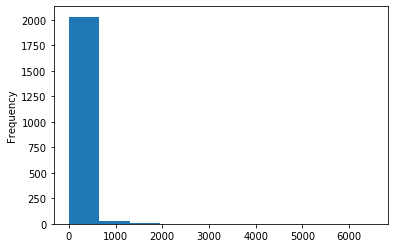

In [48]:
mask_use_ks.confirmed_deaths.hist()

In [49]:
mask_use.select('almost_always','confirmed_deaths').na.drop().to_koalas().corr('pearson')

,almost_always,confirmed_deaths
almost_always,1.00000,0.25853
confirmed_deaths,0.25853,1.00000


In [50]:
# Save mask_use as a Parquet file
# Parquet : dis
mask_use.write.parquet("/databricks/driver/ek.parquet")


In [51]:
%fs ls /databricks/driver/ek.parquet

path,name,size
dbfs:/databricks/driver/ek.parquet/_SUCCESS,_SUCCESS,0
dbfs:/databricks/driver/ek.parquet/_committed_875262953934048524,_committed_875262953934048524,122
dbfs:/databricks/driver/ek.parquet/_started_875262953934048524,_started_875262953934048524,0
dbfs:/databricks/driver/ek.parquet/part-00000-tid-875262953934048524-053b1c84-905e-4974-ac26-8d7dfd6747c6-96-1-c000.snappy.parquet,part-00000-tid-875262953934048524-053b1c84-905e-4974-ac26-8d7dfd6747c6-96-1-c000.snappy.parquet,124024


Re-do at least one excercise in SQL. (First you need to register the data as a table.)

In [53]:
mask_use.createOrReplaceTempView("mask_use_sql")

In [54]:
%sql
select state, sum(confirmed_cases),sum(confirmed_deaths) from mask_use_sql group by state having sum(confirmed_cases) > 20000

state,sum(confirmed_cases),sum(confirmed_deaths)
Utah,34429,290
Minnesota,97484,2015
Arkansas,77733,1183
Texas,739847,11841
North Dakota,20983,234
Pennsylvania,156768,4714
Connecticut,54088,3604
Nebraska,44011,485
Nevada,79191,1585
Washington,87237,2125


In [55]:
%sql
select * from mask_use_sql where fips = 1001

date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,almost_never,almost_always
2020-09-28,Autauga,Alabama,1001,1785,25,1601,24,184,1,1001,0.053,0.074,0.134,0.295,0.444,0.127,0.739


In [56]:
%sql
delete from mask_use_sql where fips = 1001

com.databricks.backend.common.rpc.DatabricksExceptions$SQLExecutionException: org.apache.spark.sql.AnalysisException: Invalid command: 'mask_use_sql' is a view not a table.; line 1 pos 0;
'DeleteFromTable ('fips = 1001)
+- 'UnresolvedV2Relation [mask_use_sql], com.databricks.sql.transaction.tahoe.catalog.DeltaCatalog@6ff46a82, default.mask_use_sql

	at org.apache.spark.sql.catalyst.analysis.package$AnalysisErrorAt.failAnalysis(package.scala:42)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.$anonfun$checkAnalysis$1(CheckAnalysis.scala:116)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.$anonfun$checkAnalysis$1$adapted(CheckAnalysis.scala:95)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:189)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1(TreeNode.scala:188)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1$adapted(TreeNode.scala:188)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:188)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.checkAnalysis(CheckAnalysis.scala:95)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.checkAnalysis$(CheckAnalysis.scala:92)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.checkAnalysis(Analyzer.scala:180)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$executeAndCheck$1(Analyzer.scala:208)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.markInAnalyzer(AnalysisHelper.scala:205)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.executeAndCheck(Analyzer.scala:205)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$analyzed$1(QueryExecution.scala:91)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:111)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:166)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:836)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:166)
	at org.apache.spark.sql.execution.QueryExecution.analyzed$lzycompute(QueryExecution.scala:92)
	at org.apache.spark.sql.execution.QueryExecution.analyzed(QueryExecution.scala:89)
	at org.apache.spark.sql.execution.QueryExecution.assertAnalyzed(QueryExecution.scala:81)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:836)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:101)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:671)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:836)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:666)
	at org.apache.spark.sql.SQLContext.sql(SQLContext.scala:672)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.$anonfun$executeSql$1(SQLDriverLocal.scala:90)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:238)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at scala.collection.TraversableLike.map(TraversableLike.scala:238)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:231)
	at scala.collection.immutable.List.map(List.scala:298)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.executeSql(SQLDriverLocal.scala:36)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.repl(SQLDriverLocal.scala:143)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$10(DriverLocal.scala:431)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.backend.daemon.driver.DriverLocal.withAttributionContext(DriverLocal.scala:48)

In [57]:
resultDF = sql("select state, sum(confirmed_cases),sum(confirmed_deaths) from mask_use_sql group by state having sum(confirmed_cases) > 80000")

In [58]:
resultDF.show()

+--------------+--------------------+---------------------+
 state|sum(confirmed_cases)|sum(confirmed_deaths)|
+--------------+--------------------+---------------------+
 Minnesota| 97484| 2015|
 Texas| 739847| 11841|
 Pennsylvania| 156768| 4714|
 Washington| 87237| 2125|
 Illinois| 290459| 8630|
 Missouri| 113317| 1966|
 Georgia| 296740| 6797|
 Michigan| 122429| 6726|
North Carolina| 81372| 1236|
 New Jersey| 203768| 14316|
 Maryland| 124156| 3796|
 Alabama| 136055| 2364|
 Iowa| 86982| 1320|
 Massachusetts| 128492| null|
 Louisiana| 164898| 5298|
 Tennessee| 183793| 883|
 Indiana| 118322| 3365|
South Carolina| 141909| 3144|
 California| 811555| 15615|
 New York| 212956| 8921|
+--------------+--------------------+---------------------+
only showing top 20 rows